# Análisis Exploratorio de datos Informacio por colegios 

Este notebook explora y analiza exhaustivamente un conjunto de datos mediante técnicas de análisis exploratorio. El análisis se centra en comprender la naturaleza, distribución y relaciones presentes en los datos, empleando visualizaciones, estadísticas descriptivas y técnicas de manipulación de datos.

### Objetivos:
- Explorar la estructura y contenido del conjunto de datos.
- Identificar patrones, tendencias y posibles relaciones entre variables.


In [8]:
# importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
# cargar los datos y definir un dataframe
path= 'colegios.csv'
df_colegios = pd.read_csv(path, sep=',')

In [10]:
df_colegios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RBD            2984 non-null   int64  
 1   NOM_RBD        2984 non-null   object 
 2   COD_COM_RBD    2984 non-null   int64  
 3   COD_DEPE2      2984 non-null   int64  
 4   LATITUD        2984 non-null   float64
 5   LONGITUD       2984 non-null   float64
 6   MAT_TOTAL      2984 non-null   int64  
 7   ESTADO_ESTAB   2984 non-null   int64  
 8   ENS_01         2984 non-null   int64  
 9   COD_ENSE2      2984 non-null   int64  
 10  COD_PRO_RBD    2984 non-null   int64  
 11  PROM_ASIS      2984 non-null   float64
 12  PROM_ASIS_REP  2984 non-null   float64
dtypes: float64(4), int64(8), object(1)
memory usage: 303.2+ KB


In [11]:
df_colegios.head()

,RBD,NOM_RBD,COD_COM_RBD,COD_DEPE2,LATITUD,LONGITUD,MAT_TOTAL,ESTADO_ESTAB,ENS_01,COD_ENSE2,COD_PRO_RBD,PROM_ASIS,PROM_ASIS_REP
0,396,INSTITUTO COMERCIAL ALEJANDRO RIVERA DÍAZ,3101,5,-27.363791,-70.334877,685,1,410,7,31,86.783737,49.409091
1,396,INSTITUTO COMERCIAL ALEJANDRO RIVERA DÍAZ,3101,5,-27.363791,-70.334877,685,1,410,7,31,86.629213,31.000000
2,397,LICEO TÉCNICO PROFESIONAL EDWIN LATORRE RIVERO,3101,5,-27.373079,-70.329651,113,1,165,3,31,84.027027,74.500000
3,397,LICEO TÉCNICO PROFESIONAL EDWIN LATORRE RIVERO,3101,5,-27.373079,-70.329651,113,1,165,3,31,85.352941,47.000000
4,397,LICEO TÉCNICO PROFESIONAL EDWIN LATORRE RIVERO,3101,5,-27.373079,-70.329651,113,1,165,6,31,75.500000,48.000000


In [12]:
# Resumen estadístico de las variables numéricas
df_colegios[['PROM_ASIS','PROM_ASIS_REP']].describe()

,PROM_ASIS,PROM_ASIS_REP
count,2984.000000,2984.000000
mean,86.245245,63.860976
std,7.559391,20.756422
min,14.320755,1.000000
25%,83.355851,51.276786
50%,87.000000,67.000000
75%,90.410647,79.500000
max,100.000000,100.000000


Estos primeros análisis sugieren que hay variabilidad significativa en la asistencia entre los colegios, lo que podría indicar diferencias en políticas internas, entornos socioeconómicos, la calidad de la enseñanza, debemos seguir explorando los datos para poder identificar patrones por comuna

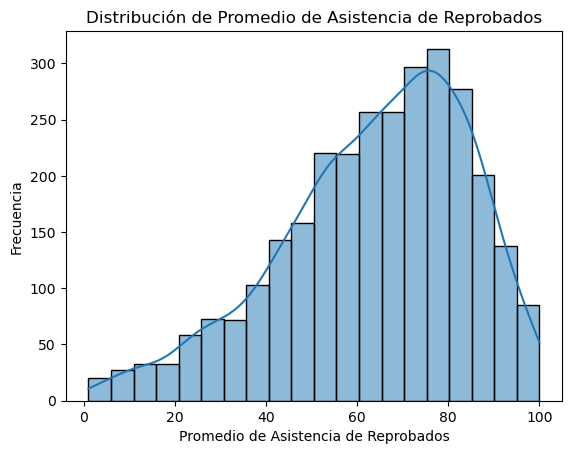

In [13]:
sns.histplot(df_colegios['PROM_ASIS_REP'], bins=20, kde=True)
plt.title('Distribución de Promedio de Asistencia de Reprobados')
plt.xlabel('Promedio de Asistencia de Reprobados')
plt.ylabel('Frecuencia')
plt.show()

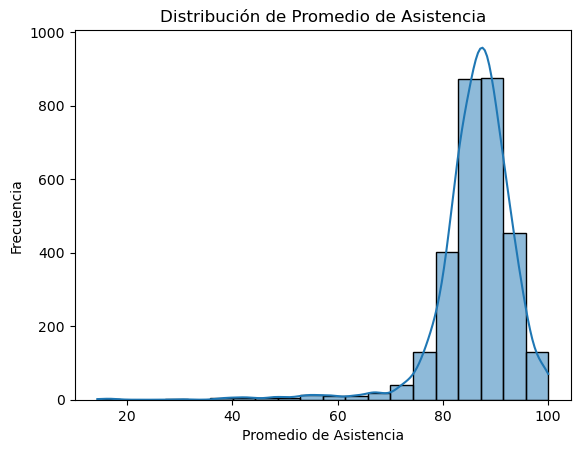

In [14]:
sns.histplot(df_colegios['PROM_ASIS'], bins=20, kde=True)
plt.title('Distribución de Promedio de Asistencia')
plt.xlabel('Promedio de Asistencia')
plt.ylabel('Frecuencia')
plt.show()

## analisis por comuna

In [27]:
# Agrupar los datos por el código de comuna y calcular promedios
promedio_por_comuna = df_colegios.groupby('COD_COM_RBD')[['PROM_ASIS', 'PROM_ASIS_REP']].mean()

# Mostrar los promedios por comuna
promedio_por_comuna.head()


,PROM_ASIS,PROM_ASIS_REP
COD_COM_RBD,,
3101,83.900359,64.045230
3102,78.806498,57.592443
3103,82.647876,56.854579
13101,85.924828,62.486490
13102,86.502749,64.337481


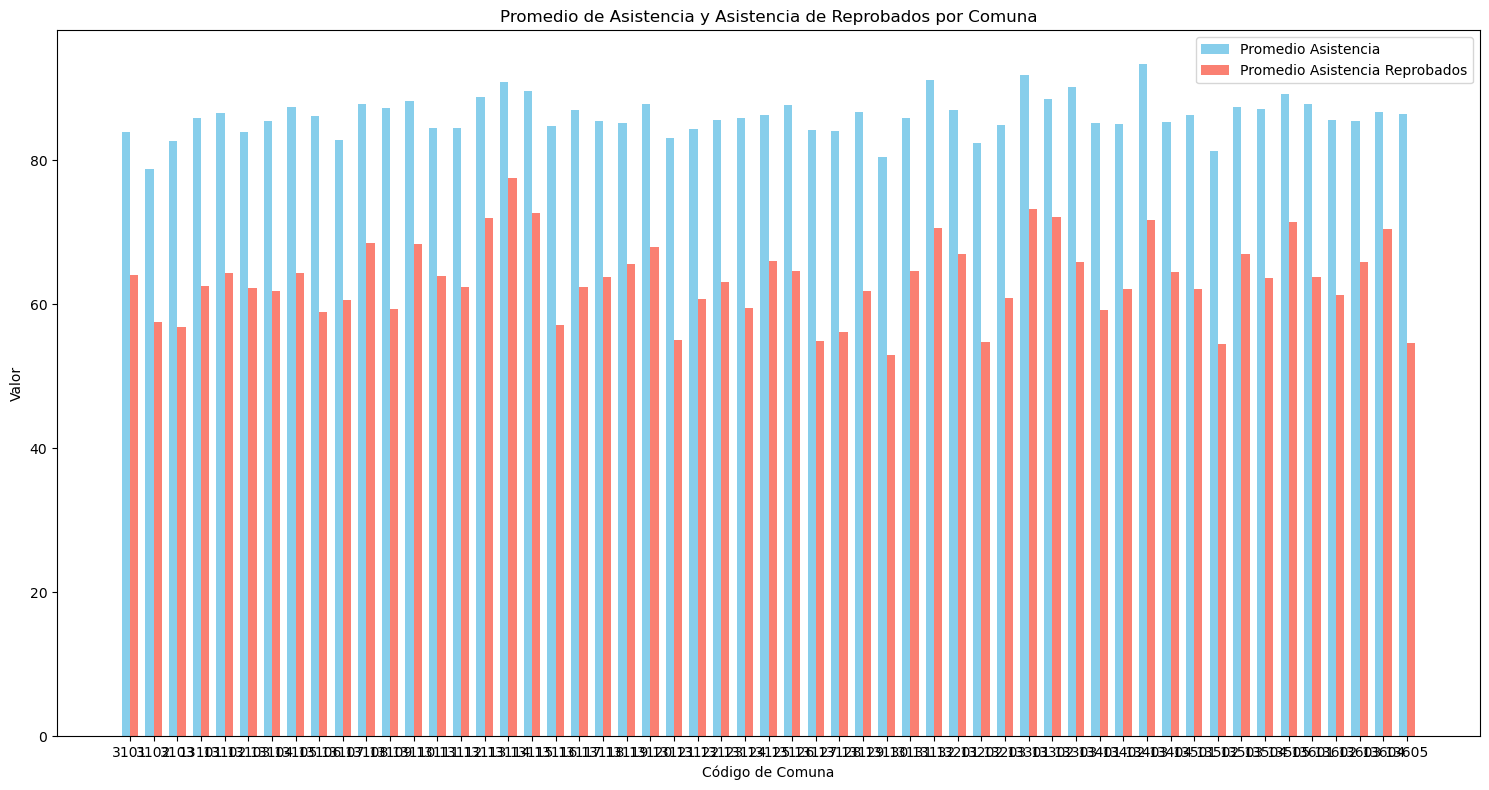

In [28]:
# Crear un gráfico de barras para visualizar los promedios de asistencia y de asistencia de reprobados por comuna
plt.figure(figsize=(15, 8))

# Obtener los datos
cod_com_rbd = promedio_por_comuna.index.values
prom_asis = promedio_por_comuna['PROM_ASIS'].values
prom_asis_rep = promedio_por_comuna['PROM_ASIS_REP'].values

# Definir el ancho de las barras
bar_width = 0.35

# Definir posición de las barras
bar1 = range(len(cod_com_rbd))
bar2 = [i + bar_width for i in bar1]

# Graficar barras
plt.bar(bar1, prom_asis, color='skyblue', width=bar_width, label='Promedio Asistencia')
plt.bar(bar2, prom_asis_rep, color='salmon', width=bar_width, label='Promedio Asistencia Reprobados')

# Etiquetas y título
plt.xlabel('Código de Comuna')
plt.ylabel('Valor')
plt.title('Promedio de Asistencia y Asistencia de Reprobados por Comuna')
plt.xticks([r + bar_width / 2 for r in range(len(cod_com_rbd))], cod_com_rbd)
plt.legend()

plt.tight_layout()

In [29]:
promedio_por_comuna.describe()

,PROM_ASIS,PROM_ASIS_REP
count,55.000000,55.000000
mean,86.132006,63.472091
std,2.712648,5.527131
min,78.806498,52.930799
25%,84.638271,60.007532
50%,85.924828,63.645688
75%,87.572919,66.478376
max,93.367370,77.541273



El promedio general de asistencia por comuna es de aproximadamente 86.13%, con una desviación estándar de 2.71. Esto indica una consistencia relativa en la asistencia promedio entre las comunas.
Asistencia de reprobados:

El promedio general de asistencia para estudiantes reprobados es de alrededor del 63.47%, con una desviación estándar de 5.53. Existe una variación más amplia en estos valores en comparación con el promedio de asistencia general.

Los valores de asistencia mínimos y máximos para ambas categorías (asistencia general y asistencia de reprobados) presentan diferencias considerables. El rango va desde alrededor del 78.81% hasta el 93.37% para la asistencia general y desde aproximadamente 52.93% hasta 77.54% para la asistencia de reprobados.
Diferencia entre asistencia general y de reprobados:

La asistencia de reprobados tiende a ser consistentemente menor que la asistencia general en todas las comunas, lo que sugiere una disparidad en la asistencia entre los dos grupos.


Si bien la asistencia promedio es relativamente alta en la mayoría de las comunas, la variabilidad en la asistencia de reprobados es más significativa, mostrando una gama más amplia de valores entre las diferentes áreas.